In [1]:
g_kernel = 1
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
def similarity(X,omit_index,perp = 5,p_or_q = 'p'):
    
    sum_similarity = []
    for i in range(X.shape[0]):
        if i != omit_index:
            if p_or_q == 'p':
                distance = np.exp(-np.linalg.norm(X[omit_index] - X[i])**2/2*g_kernel**2)
            else:
                distance = (1 + np.linalg.norm(X[omit_index] - X[i]))**-1
                
            sum_similarity.append([i,distance])
            
    sum_similarity = sorted(sum_similarity , key = lambda k:k[1])
    
    return sum_similarity[:perp]

In [3]:
def similarity_pij(X,i,j):
    # num=(1+np.linalg.norm(x1-x2)**2)**(-1)/(2*g_kernel**2))
    num = np.exp(-np.linalg.norm(X[i]-X[j])**2)/(2*g_kernel**2)
    den = np.sum([e[1] for e in similarity(X,i,p_or_q = 'p')])
    
    return num/den

In [4]:
def compute_p(X):
    table=np.zeros((X.shape[0],X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            if i!=j:
                pij=similarity_pij(X,i,j)
                pji=similarity_pij(X,j,i)
                table[i,j]=(pij+pji)/(2*X.shape[0])
                # table[i,j]=pij
    return table

In [11]:
def similarity_qij(Y,i,j):
    num = (1 + np.linalg.norm(Y[i]-Y[j])**2)/(2*g_kernel**2)
    den = np.sum([e[1] for e in similarity(Y,i,p_or_q = 'q')])
    
    return num/den

In [12]:
def compute_q(Y):
    table=np.zeros((Y.shape[0],Y.shape[0]))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[0]):
            if i!=j:
                qij=similarity_qij(Y,i,j)
                table[i,j]=qij
    return table

In [13]:
def kl_divergence(p,q):
    total=0
    for i in range(p.shape[0]):
        for j in range(q.shape[0]):
            if q[i,j]!=0 and p[i,j]!=0:
                total+=p[i,j]*np.log(p[i,j]/q[i,j])
    return total

In [17]:
def gradient_descent(p,q,y):
    history=np.zeros((p.shape[0],2,y.shape[1]))
    for iter in range(1000):
        for i in range(y.shape[0]):
            sum_value=0
            for j in range(y.shape[0]):
                sum_value+=((y[i]-y[j])*(p[i,j]-q[i,j])*(1+np.linalg.norm(y[i]-y[j]**2))**-1)
            y[i]-=4*200*sum_value+0.99*(history[i,1]-history[i,0])
            history[i,0]=history[i,1]
            history[i,1]=y[i]
        if iter%100==0:
            q=compute_q(y)
            print(kl_divergence(p,q)) 
    y-=np.mean(y)
    y/=np.std(y)
    return y

In [18]:
def main():
    #I choose a dataset with two well separated part
    x=np.random.rand(10,3)
    x=np.tile(x,(2,1))
    x[:10]*=0.1
    color=['blue']*10+['red']*10

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:,0],x[:,1],x[:,2],color=color)
    plt.show()

    table_p=compute_p(x)

    #Probably not the right way to initialize the new space y
    y=x.dot(np.random.rand(x.shape[1],2))
    y-=np.mean(y)
    y/=np.std(y)
    table_q=compute_q(y)
    y=gradient_descent(table_p,table_q,y)

    plt.scatter(y[:,0],y[:,1],color=color)
    plt.show()

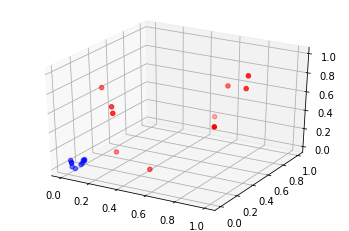

-66.81200233492696
-258.4524506879716
-831.4472244109816


C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in multiply
  import sys
C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


nan
nan
nan
nan
nan
nan
nan


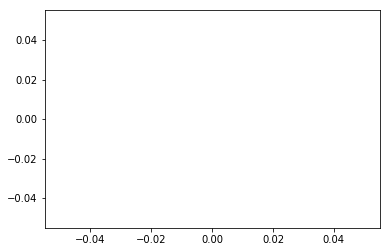

In [19]:
main()